# Epidemic Sim

## ODE Sim Method (Euler)
Ordinary Differential Equation, computing averages
> Euler explicit algorithm (or forward Euler) 

In [1]:
# epidemic parameters
beta = 0.001
gamma = 0.1

In [2]:
# Euler simulation of a SIR epidemic model

import numpy as np
import pandas as pd
from IPython.display import display

# create df with columns for S, I, R
df = pd.DataFrame(columns=['S', 'I', 'R'])

# initial conditions
# add a row to df with initial conditions
df.loc[len(df.index)] = [500, 1, 0]
display(df.head(5))

# df = pd.concat({'S': 999, 'I': 1, 'R': 0}, ignore_index=True)

nb_steps = 100

,S,I,R
0,500,1,0


In [3]:
# empty df except first row
df = df.iloc[0:1]

# run simulation
for i in range(nb_steps):
    # get last row of df
    last_step_row = df.iloc[i]
    # get values of last row
    S = last_step_row['S']
    I = last_step_row['I']
    R = last_step_row['R']
    # compute new values
    new_S = S - beta*I*S
    new_I = I + beta*I*S - gamma*I
    new_R = R + gamma*I
    # add new row to end of df
    df.loc[len(df.index)] = [new_S, new_I, new_R]

display(df.head(5))
print(df.shape)

,S,I,R
0,500.00000,1.000000,0.000000
1,499.50000,1.400000,0.100000
2,498.80070,1.959300,0.240000
3,497.82340,2.740670,0.435930
4,496.45903,3.830973,0.709997


(101, 3)


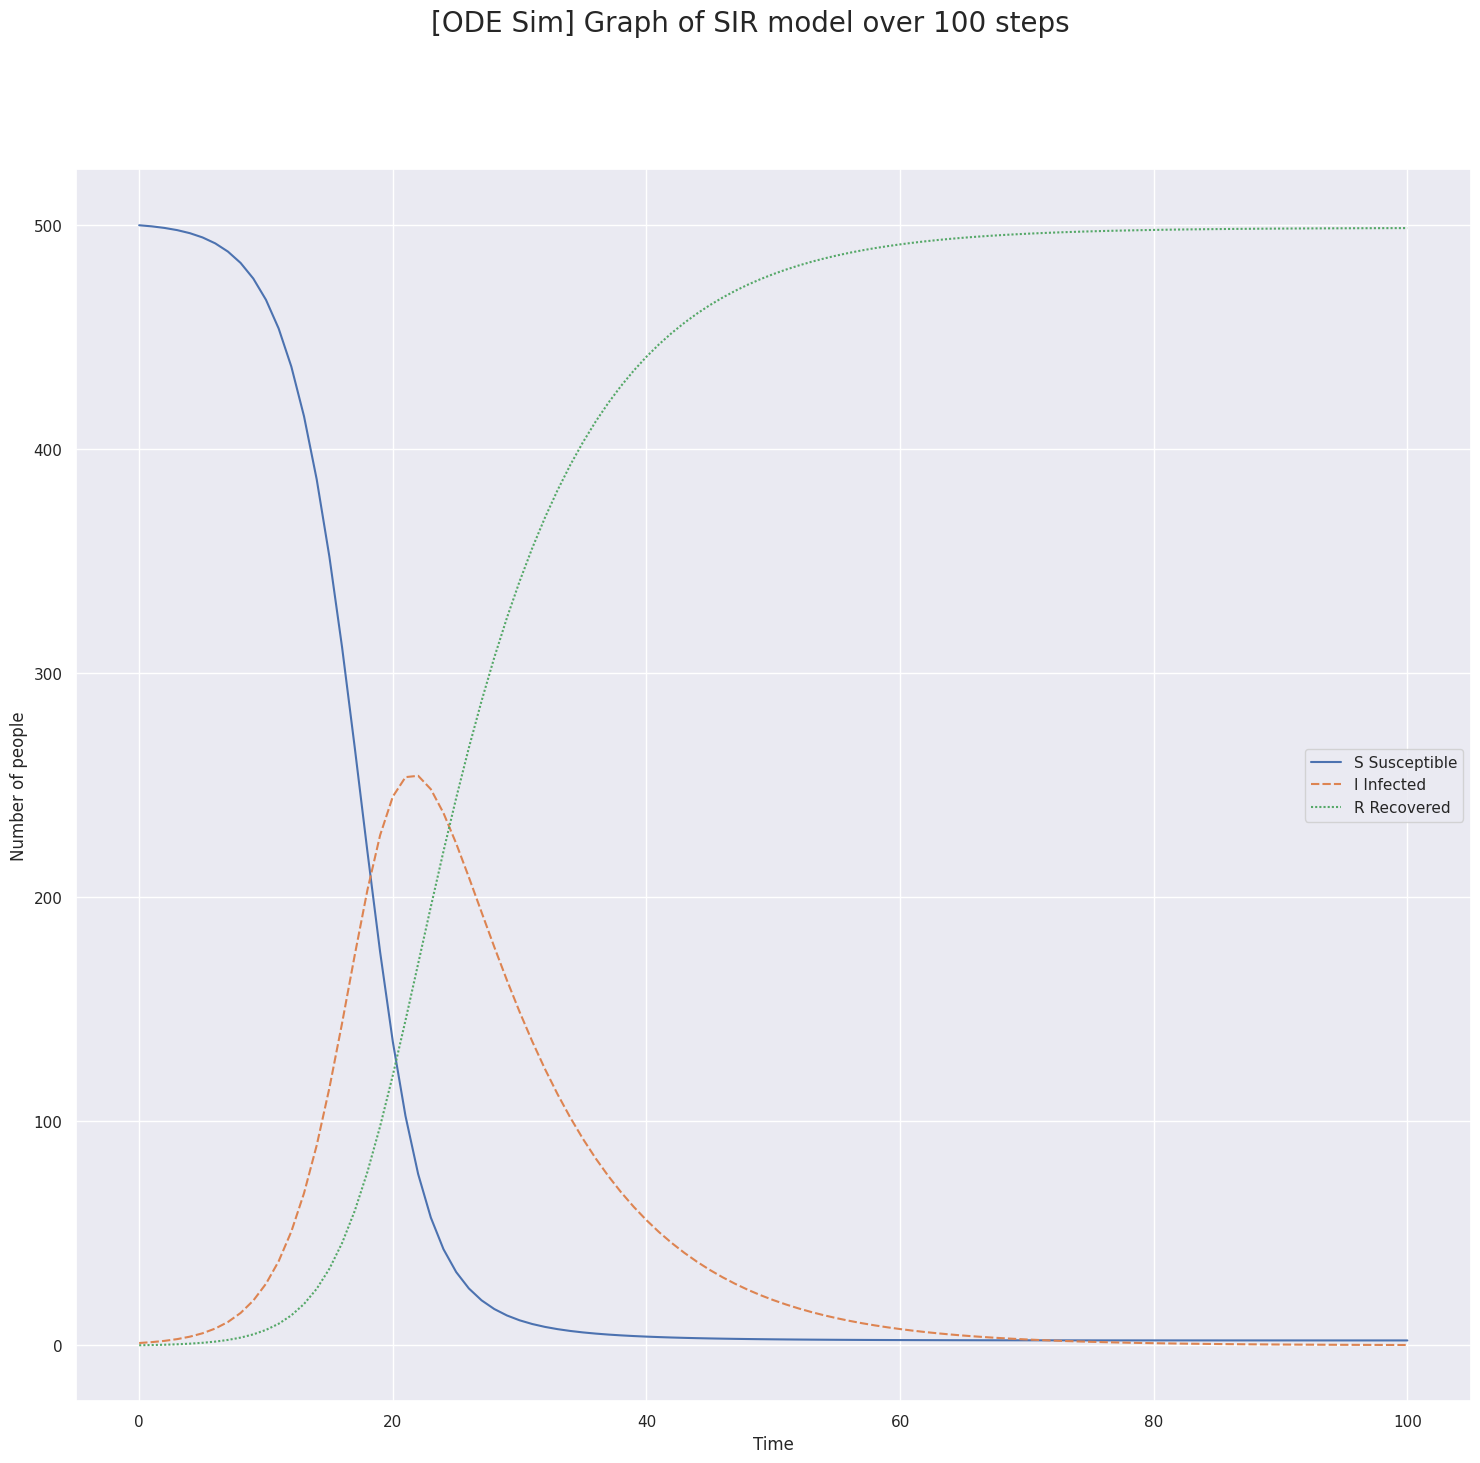

In [4]:
# plot results
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

fig, ax = plt.subplots(1, 1, figsize=(18,16))
fig.suptitle(f"[ODE Sim] Graph of SIR model over {nb_steps} steps", fontsize=20)

g = sns.lineplot(data=df, ax=ax)
g.set(xlabel="Time", ylabel="Number of people")

# legend settings
g.legend().set_title("curves")
# replace labels
new_labels = ['S Susceptible', 'I Infected', 'R Recovered']
for t, l in zip(g.legend().texts, new_labels):
    t.set_text(l)

## SSA (Gillespie)
Stochastic Simulation Algorithms
> Next reaction algorithm (Gillespie)

In [67]:
# sim parameters
beta = 0.001
gamma = 0.1
max_time = 100

# S+I -beta-> I+I (need infected and susceptible -> infected and new infected)
# I -gamma-> R (need infected -> recovered)
# enum of reactions
from enum import Enum
class Reactions(str, Enum):
    NEW_INFECTED = "S+I -beta-> I+I"
    NEW_RECOVERED = "I -gamma-> R"

# propensities
def P1(S, I): return beta*S*I
def P2(I): return gamma*I

In [68]:
# next reaction (Gillespie) simulation of a SIR epidemic model
import numpy as np
import pandas as pd
from IPython.display import display

# create df with columns for S, I, R
df = pd.DataFrame(columns=['time', 'S', 'I', 'R'])

# initial conditions
# add a row to df with initial conditions
df.loc[len(df.index)] = [0, 500, 1, 0]
display(df.head(5))

,time,S,I,R
0,0,500,1,0


In [69]:
# empty df except first row
df = df.iloc[0:1]

def G(p1, p2, p):
    # choose next reaction
    r = np.random.rand()

    # return selected reaction
    if r < p1/p:
        return Reactions.NEW_INFECTED
    else:
        return Reactions.NEW_RECOVERED

# run simulation
time = 0
while time < max_time:
    # get last row of df
    last_step_row = df.iloc[len(df.index) - 1]

    # get values of last row
    S = last_step_row['S']
    I = last_step_row['I']
    R = last_step_row['R']

    # compute each reaction propensity
    p1 = P1(S, I)
    p2 = P2(I)

    # compute total propensity
    p = p1 + p2

    # compute time to next reaction
    time = time - np.log(np.random.rand())/p

    selected_reaction = G(p1, p2, p)

    # update model
    if selected_reaction == Reactions.NEW_INFECTED:
        # S+I -beta-> I+I
        new_S = S - 1
        new_I = I + 1
        new_R = R
    elif selected_reaction == Reactions.NEW_RECOVERED:
        # I -gamma-> R
        new_S = S
        new_I = I - 1
        new_R = R + 1

    # update time
    #print(f"Time: {time:.2f} ")

    # save new row
    df.loc[len(df.index)] = [time, new_S, new_I, new_R]

display(df.head(5))
print(df.shape)

/tmp/ipykernel_33365/3765936051.py:33: RuntimeWarning: divide by zero encountered in double_scalars
  time = time - np.log(np.random.rand())/p
/tmp/ipykernel_33365/3765936051.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if r < p1/p:


,time,S,I,R
0,0.000000,500.0,1.0,0.0
1,4.577434,499.0,2.0,0.0
2,4.973594,498.0,3.0,0.0
3,5.158034,497.0,4.0,0.0
4,5.275871,496.0,5.0,0.0


(1001, 4)


[Text(0.5, 0, 'Time'), Text(0, 0.5, 'Number of people')]

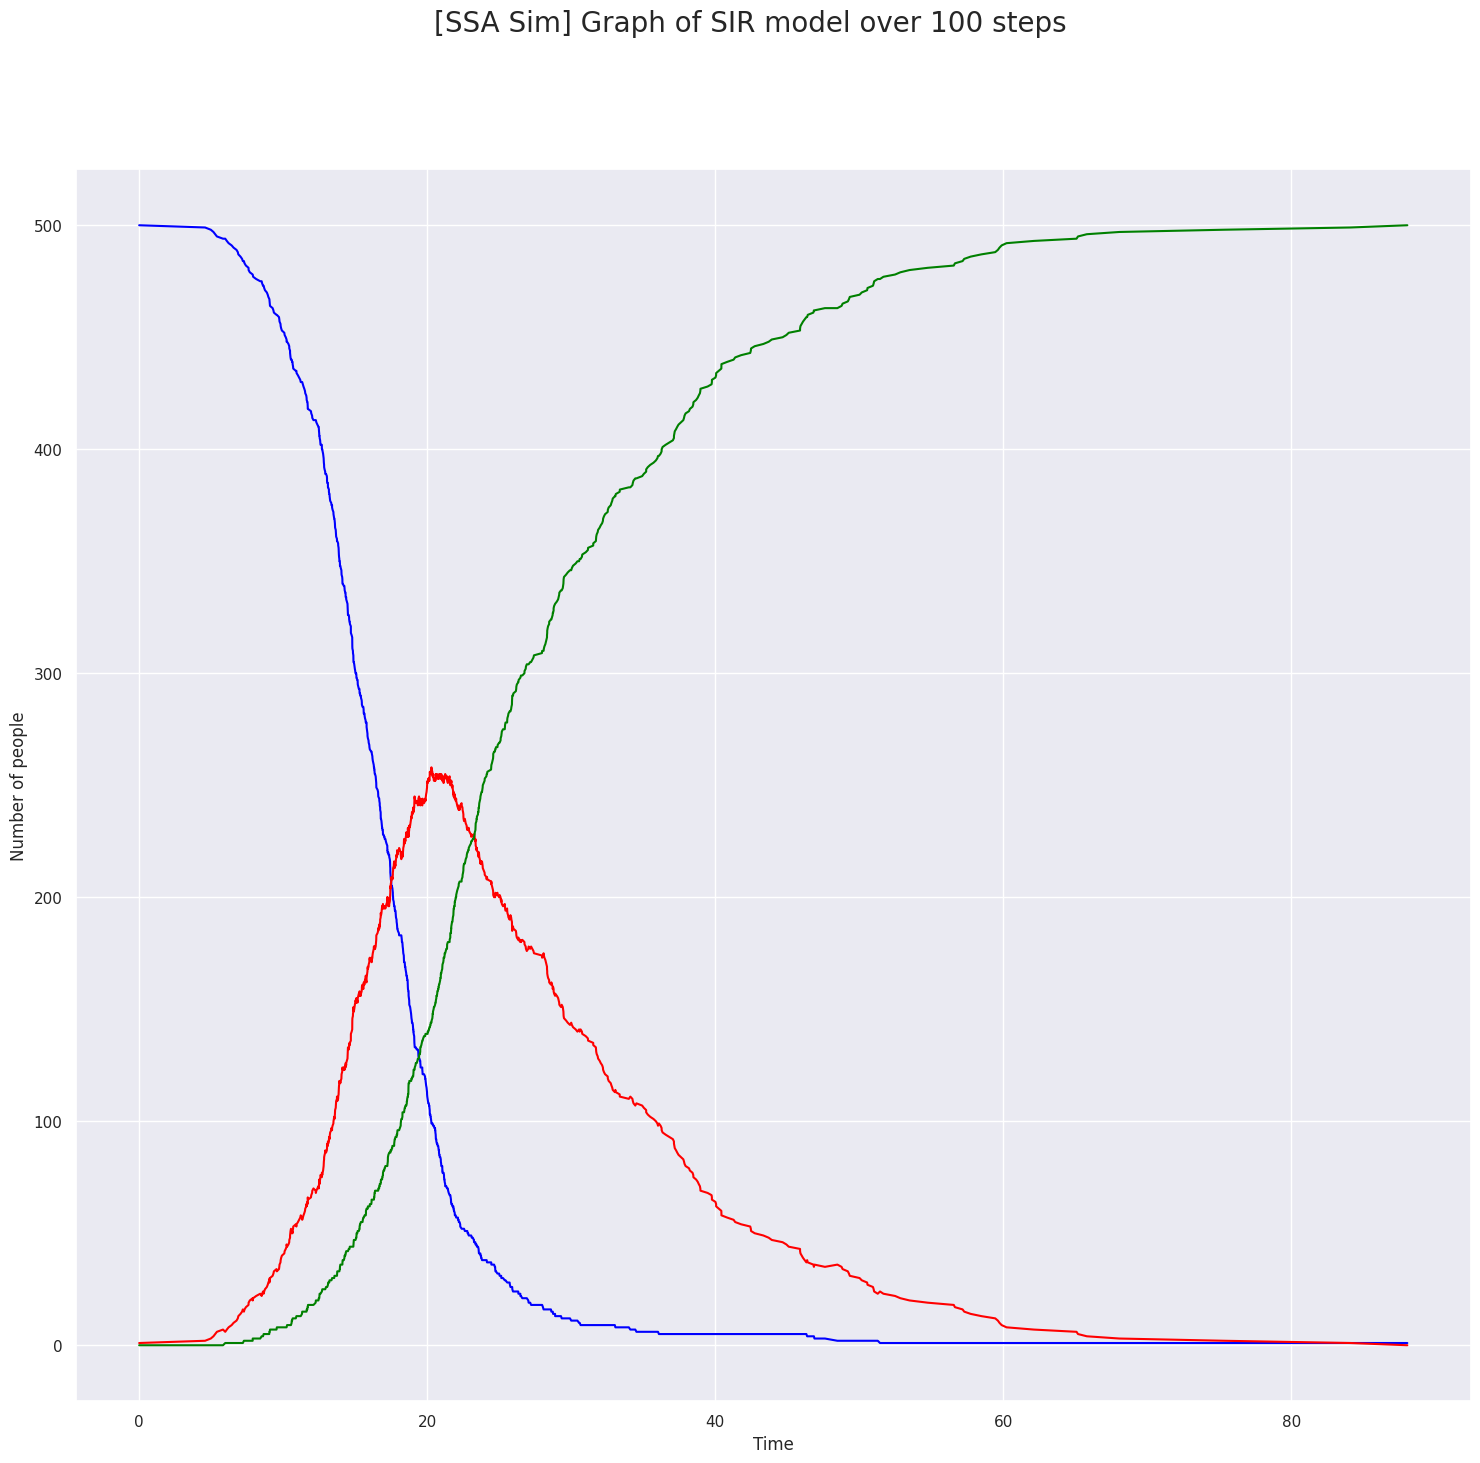

In [70]:
# plot results
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

fig, ax = plt.subplots(1, 1, figsize=(18,16))
fig.suptitle(f"[SSA Sim] Graph of SIR model over {nb_steps} steps", fontsize=20)

# plot with x axis as time
g = sns.lineplot(data=df, ax=ax, x='time', y='S', color='blue')
g = sns.lineplot(data=df, ax=ax, x='time', y='I', color='red')
g = sns.lineplot(data=df, ax=ax, x='time', y='R', color='green')
g.set(xlabel="Time", ylabel="Number of people")

# legend setting